<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

In [1]:
# ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÎ©¥ Ïù¥ ÏÖÄÏùò ÏΩîÎìúÎ•º Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 15 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 13.53 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Updating files: 100% (118/118), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.41.2
Using datasets v2.20.0
Using accelerate v0.32.1
Using sentencepiece v0.1.99
Using umap v0.5.6


# ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò

<img alt="Tesla Tweet" width="500" caption="Analyzing Twitter content can yield useful feedback from customers (courtesy of Aditya Veluri)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_tweet.png?raw=1" id="tesla-tweet"/>

<img alt="Hugging Face Pipeline" caption="A typical pipeline for training transformer models with the image:images/logo.png[hf,13,13] Datasets, image:images/logo.png[hf,13,13] Tokenizers, and image:images/logo.png[hf,13,13] Transformers libraries" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_hf-libraries.png?raw=1" id="hf-libraries"/>

## Îç∞Ïù¥ÌÑ∞ÏÖã

### ÌóàÍπÖ ÌéòÏù¥Ïä§ Îç∞Ïù¥ÌÑ∞ÏÖã Ï≤òÏùå ÏÇ¨Ïö©ÌïòÍ∏∞

In [2]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî {len(all_datasets)}Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.")
print(f"Ï≤òÏùå 10Í∞ú Îç∞Ïù¥ÌÑ∞ÏÖã: {all_datasets[:10]}")

<ipython-input-2-15a41e0e2f18>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî 176729Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.
Ï≤òÏùå 10Í∞ú Îç∞Ïù¥ÌÑ∞ÏÖã: ['amirveyseh/acronym_identification',
'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa',
'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news',
'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar',
'legacy-datasets/allegro_reviews']


Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Í≥†Ïú†Ìïú Ïù¥Î¶ÑÏù¥ ÏûàÏäµÎãàÎã§. `load_dataset()` Ìï®ÏàòÎ°ú `emotion` Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌï¥Î≥¥Ï£†.

In [3]:
from datasets import load_dataset

# emotion Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Îã§Ïö¥Î°úÎìúÎêòÏßÄ ÏïäÏúºÎ©¥ SetFit/emotionÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
emotions = load_dataset("emotion")

The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
emotions['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
emotions['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
# SetFit/emotion Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÏö∞ ÏàòÎèôÏúºÎ°ú ClassLabel Í∞ùÏ≤¥Î•º ÎßåÎì§Ïñ¥ labelÏóê Ìï†ÎãπÌï©ÎãàÎã§.
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6,
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [8]:
emotions['train'].features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [9]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [11]:
len(train_ds)

16000

In [12]:
train_ds[2]

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

In [13]:
train_ds.column_names

['text', 'label']

In [14]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [15]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


In [16]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned
hopeful just from being around someone who cares and is awake', 'im grabbing a
minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the
fireplace i will know that it is still on the property', 'i am feeling grouchy']


### ÏÇ¨Ïù¥ÎìúÎ∞î: ÌóàÎ∏åÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏóÜÎã§Î©¥ Ïñ¥ÎñªÍ≤å ÌïòÎÇòÏöî?

***`emotion` Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎìúÎ°≠Î∞ïÏä§ Í≤ΩÎ°úÍ∞Ä ÌòÑÏû¨ Ïú†Ìö®ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ ÏÇ¨Ïù¥ÎìúÎ∞îÏùò ÏΩîÎìúÎäî Ïã§ÌñâÎêòÏßÄ ÏïäÏäµÎãàÎã§.***

In [17]:
# dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
# !wget {dataset_url}

In [18]:
# !head -n 1 train.txt

In [19]:
# emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
#                               names=["text", "label"])

In [20]:
# dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
# emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
#                                names=["text", "label"])

### ÏÇ¨Ïù¥ÎìúÎ∞î ÎÅù

### Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú

In [21]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [22]:
emotions["train"].features['label'].__class__

datasets.features.features.ClassLabel

In [23]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

### ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÏÇ¥Ìé¥ Î≥¥Í∏∞

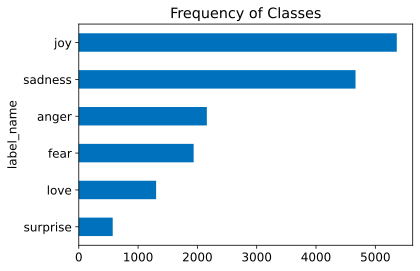

In [24]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

### Ìä∏Ïúó Í∏∏Ïù¥ ÌôïÏù∏

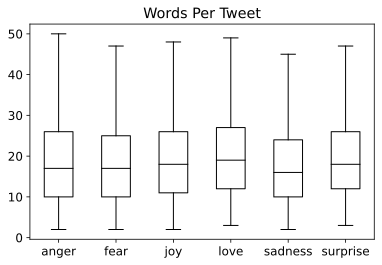

In [25]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [26]:
emotions.reset_format()

## ÌÖçÏä§Ìä∏ÏóêÏÑú ÌÜ†ÌÅ∞ÏúºÎ°ú

### Î¨∏Ïûê ÌÜ†ÌÅ∞

In [27]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [28]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [29]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [30]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2

In [31]:
pd.get_dummies(categorical_df["Name"])

Bumblebee  Megatron  Optimus Prime
0       True     False          False
1      False     False           True
2      False      True          False

In [32]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [33]:
print(f"ÌÜ†ÌÅ∞: {tokenized_text[0]}")
print(f"ÌÖêÏÑú Ïù∏Îç±Ïä§: {input_ids[0]}")
print(f"Ïõê-Ìï´ Ïù∏ÏΩîÎî©: {one_hot_encodings[0]}")

ÌÜ†ÌÅ∞: T
ÌÖêÏÑú Ïù∏Îç±Ïä§: 5
Ïõê-Ìï´ Ïù∏ÏΩîÎî©: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [34]:
F.one_hot(torch.tensor([0,2]), num_classes=11).shape

torch.Size([2, 11])

In [35]:
import tensorflow as tf

tf.one_hot([0,1, 2], 1)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.]], dtype=float32)>

### Îã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî

In [36]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Î∂ÄÎ∂ÑÎã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî

In [37]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [38]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [39]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [40]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [41]:
tokenizer.vocab_size

30522

In [42]:
tokenizer.model_max_length

512

In [43]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞

In [44]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [45]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


In [46]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

0      1      2      3       4
Special Token     [PAD]  [UNK]  [CLS]  [SEP]  [MASK]
Special Token ID      0    100    101    102     103

<img alt="attention-mask" caption="For each batch, the input sequences are padded to the maximum sequence length in the batch; the attention mask is used in the model to ignore the padded areas of the input tensors" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_attention-mask.png?raw=1" id="attention-mask"/>

In [47]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [48]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [49]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏ ÌõàÎ†®ÌïòÍ∏∞

<img alt="encoder-classifier" caption="The architecture used for sequence classification with an encoder-based transformer; it consists of the model's pretrained body (blue) combined with a custom classification head (orange)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_encoder-classifier.png?raw=1" id="encoder-classifier"/>

### Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÌäπÏÑ± Ï∂îÏ∂úÍ∏∞Î°ú ÏÇ¨Ïö©ÌïòÍ∏∞

<img alt="encoder-features" caption="In the feature-based approach, the DistilBERT model is frozen and just provides features for a classifier" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_encoder-feature-based.png?raw=1" id="encoder-features"/>

#### ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©ÌïòÍ∏∞

In [50]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

### ÏÇ¨Ïù¥ÎìúÎ∞î: ÌîÑÎ†àÏûÑÏõåÌÅ¨ Í∞ÑÏùò ÏÉÅÌò∏ Ïö¥ÏòÅÏÑ±

In [51]:
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

In [52]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

### ÏÇ¨Ïù¥ÎìúÎ∞î ÎÅù

#### ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉú Ï∂îÏ∂úÌïòÍ∏∞

In [53]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞: {inputs['input_ids'].size()}")

ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞: torch.Size([1, 6])


In [54]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [55]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [56]:
outputs.last_hidden_state.size()  # batch_size, seq_len, hidden_dim

torch.Size([1, 6, 768])

In [57]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [58]:
def extract_hidden_states(batch):
    # Î™®Îç∏ ÏûÖÎ†•ÏùÑ GPUÎ°ú ÏòÆÍπÅÎãàÎã§.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉúÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] ÌÜ†ÌÅ∞Ïóê ÎåÄÌïú Î≤°ÌÑ∞Î•º Î∞òÌôòÌï©ÎãàÎã§.
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [59]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [60]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [61]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

#### ÌäπÏÑ± ÌñâÎ†¨ ÎßåÎì§Í∏∞

In [62]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

#### ÌõàÎ†® ÏÑ∏Ìä∏ ÏãúÍ∞ÅÌôîÌïòÍ∏∞

In [63]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# ÌäπÏÑ± Ïä§ÏºÄÏùºÏùÑ [0,1] Î≤îÏúÑÎ°ú Ï°∞Ï†ïÌï©ÎãàÎã§.
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†®ÏãúÌÇµÎãàÎã§.
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# 2D ÏûÑÎ≤†Îî©Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì≠ÎãàÎã§.
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

X         Y  label
0  4.174319  6.873007      0
1 -3.280809  5.826101      0
2  5.345909  3.440333      3
3 -2.243855  4.051088      2
4 -3.390566  4.021642      3

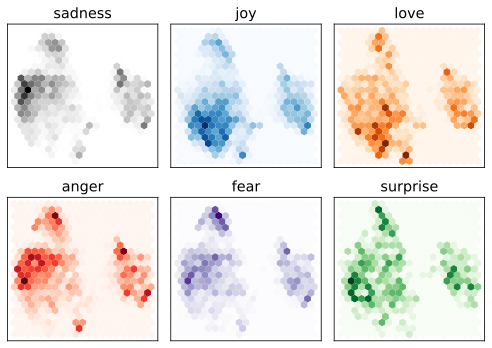

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

#### Í∞ÑÎã®Ìïú Î∂ÑÎ•ò Î™®Îç∏ ÌõàÎ†®ÌïòÍ∏∞

In [65]:
# ÏàòÎ†¥ÏùÑ Î≥¥Ïû•ÌïòÍ∏∞ ÏúÑÌï¥ `max_iter`Î•º Ï¶ùÍ∞ÄÏãúÌÇµÎãàÎã§.
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [66]:
lr_clf.score(X_valid, y_valid)

0.6335

In [67]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

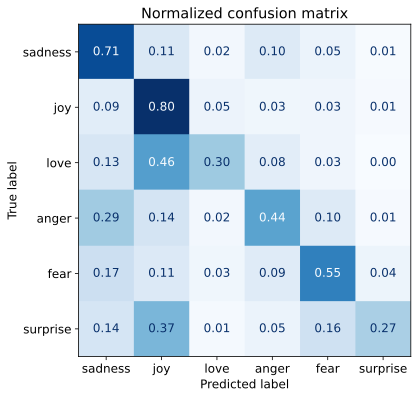

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

### Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

<img alt="encoder-tuning" caption="When using the fine-tuning approach the whole DistilBERT model is trained along with the classification head" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_encoder-fine-tuning.png?raw=1" id="encoder-tuning"/>

#### ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ Î°úÎìúÌïòÍ∏∞

In [69]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

#### ÏÑ±Í≥µ ÏßÄÌëú Ï†ïÏùòÌïòÍ∏∞

In [70]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#### Î™®Îç∏ ÌõàÎ†®ÌïòÍ∏∞

In [71]:
!pip install huggingface_hub

In [75]:
from huggingface_hub import notebook_login

# notebook_login()

In [76]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [77]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

In [78]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [79]:
preds_output.metrics

{'test_loss': 0.21678505837917328,
 'test_accuracy': 0.9275,
 'test_f1': 0.9274983639058944,
 'test_runtime': 4.158,
 'test_samples_per_second': 481.002,
 'test_steps_per_second': 7.696}

In [80]:
y_preds = np.argmax(preds_output.predictions, axis=1)

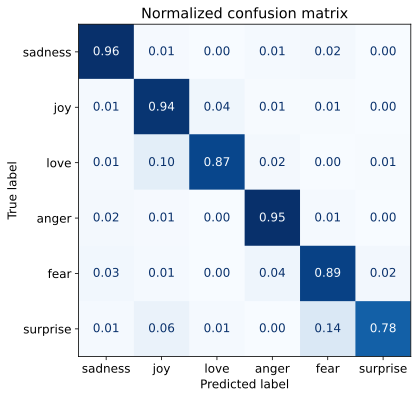

In [81]:
plot_confusion_matrix(y_preds, y_valid, labels)

### ÏÇ¨Ïù¥ÎìúÎ∞î: ÏºÄÎùºÏä§Î°ú ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

In [ ]:
# from transformers import TFAutoModelForSequenceClassification

# tf_model = (TFAutoModelForSequenceClassification
#             .from_pretrained(model_ckpt, num_labels=num_labels))

In [ ]:
# # ÌÖêÏÑúÌîåÎ°ú ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌï† Ïó¥ Ïù¥Î¶Ñ
# tokenizer_columns = tokenizer.model_input_names

# tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
#     columns=tokenizer_columns, label_cols=["label"], shuffle=True,
#     batch_size=batch_size)
# tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
#     columns=tokenizer_columns, label_cols=["label"], shuffle=False,
#     batch_size=batch_size)

In [ ]:
# import tensorflow as tf

# tf_model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=tf.metrics.SparseCategoricalAccuracy())

# tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

### ÏÇ¨Ïù¥ÎìúÎ∞î ÎÅù

#### Ïò§Î•ò Î∂ÑÏÑù

In [82]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Î™®Îì† ÏûÖÎ†• ÌÖêÏÑúÎ•º Î™®Îç∏Í≥º Í∞ôÏùÄ Ïû•ÏπòÎ°ú Ïù¥ÎèôÌï©ÎãàÎã§.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ïó¥Í≥º Ìò∏ÌôòÎêòÎèÑÎ°ù Ï∂úÎ†•ÏùÑ CPUÎ°ú ÏòÆÍπÅÎãàÎã§.
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [83]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïãú ÌååÏù¥ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# ÏÜêÏã§ Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [84]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [85]:
df_test.sort_values("loss", ascending=False).head(10)

text     label  \
1950  i as representative of everything thats wrong ...  surprise   
1963  i called myself pro life and voted for perry w...       joy   
1870  i guess i feel betrayed because i admired him ...       joy   
1801  i feel that he was being overshadowed by the s...      love   
465   i would eventually go in to these stores but i...       joy   
1500  i guess we would naturally feel a sense of lon...     anger   
882   i feel badly about reneging on my commitment t...      love   
1274  i am going to several holiday parties and i ca...       joy   
318   i felt ashamed of these feelings and was scare...      fear   
1683  i had applied for a job and they had assured m...     anger   

     predicted_label      loss  
1950         sadness  5.489305  
1963         sadness  5.383436  
1870         sadness  5.380044  
1801         sadness  5.089911  
465             fear  4.920991  
1500         sadness  4.815633  
882          sadness  4.757434  
1274         sadness  4.748882  
318          sadness  4.547329  
1683             joy  4.438409

In [86]:
df_test.sort_values("loss", ascending=True).head(10)

text    label  \
1452  i always feel guilty and come to one conclusio...  sadness   
173   i expected to feel more but nope i dont and th...      joy   
632           i feel he is an terrific really worth bet      joy   
394   i feel shamed that i hoped for one last christ...  sadness   
1861  im tired of feeling lethargic hating to work o...  sadness   
1561  i came to tv stations for first debut stage i ...      joy   
69    i have no extra money im worried all of the ti...  sadness   
657   i don t know when i will want to tell her and ...  sadness   
1205  i log on feeling vaguely sociable and after a ...      joy   
410   i feel like if he was innocent he wouldn t fee...      joy   

     predicted_label      loss  
1452         sadness  0.018624  
173              joy  0.018908  
632              joy  0.019192  
394          sadness  0.019228  
1861         sadness  0.019400  
1561             joy  0.019404  
69           sadness  0.019559  
657          sadness  0.019586  
1205             joy  0.019628  
410              joy  0.019631

#### Î™®Îç∏ Ï†ÄÏû• Î∞è Í≥µÏú†

In [87]:
# trainer.push_to_hub(commit_message="Training completed!")

In [88]:
from transformers import pipeline

# `haesun`Î•º ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
model_id = "haesun/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [89]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


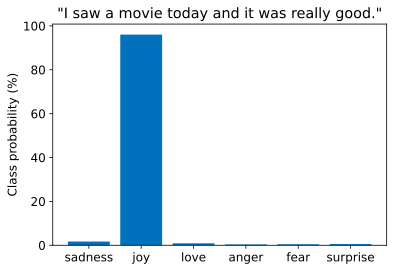

In [90]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

## Í≤∞Î°†